In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_datareader import data as pdr
from pandas_datareader.famafrench import get_available_datasets

ff=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench',start='1991-1-1')[0]
ff.head()

Mkt-RF   SMB   HML     RF
Date                                 
1991-01-02   -0.95  0.64  0.82  0.023
1991-01-03   -1.25  0.28  1.17  0.023
1991-01-04   -0.24  0.12  0.42  0.023
1991-01-07   -1.72  0.32  0.23  0.023
1991-01-08   -0.29 -0.36 -0.01  0.023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import scipy.stats as sst
import yfinance as yf
yf.pdr_override()

In [3]:
Google_classA = pdr.get_data_yahoo('GOOGL')
Google_classC = pdr.get_data_yahoo('GOOG')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Limitation: the global financial crisis of 2008 is a prime example. During this period, stock prices of many companies, including Google, experienced significant declines, which were largely driven by broader economic conditions and investor sentiment, rather than by the underlying performance of the companies themselves.

In [4]:
Google_classA.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.502503  2.604104  2.401401  2.511011   2.511011  893181924
2004-08-20  2.527778  2.729730  2.515015  2.710460   2.710460  456686856
2004-08-23  2.771522  2.839840  2.728979  2.737738   2.737738  365122512
2004-08-24  2.783784  2.792793  2.591842  2.624374   2.624374  304946748
2004-08-25  2.626627  2.702703  2.599600  2.652653   2.652653  183772044

In [5]:
Google_classC.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512

In [6]:
Google_classA['simple_return'] = Google_classA['Adj Close'] / Google_classA['Adj Close'].shift(1)-1
Google_classA=Google_classA.dropna()
Google_classA['simple_return']

Date
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010776
2004-08-26    0.018019
                ...   
2023-03-09   -0.020477
2023-03-10   -0.018306
2023-03-13    0.005296
2023-03-14    0.031391
2023-03-15    0.022773
Name: simple_return, Length: 4674, dtype: float64

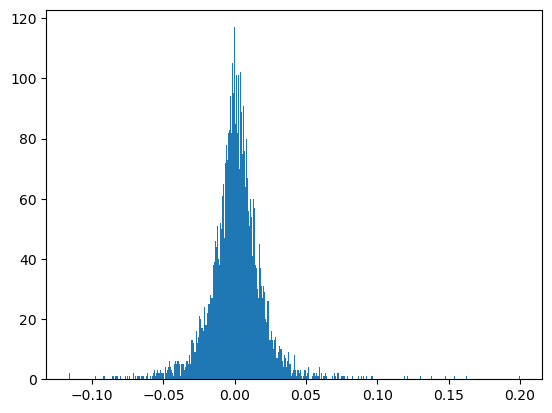

In [7]:
H1 = Google_classA['simple_return']
plt.hist(H1,bins=500)
plt.show()

In [8]:
Google_classC['simple_return'] = Google_classC['Adj Close'] / Google_classC['Adj Close'].shift(1)-1
Google_classC=Google_classC.dropna()
Google_classC['simple_return']

Date
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
2004-08-26    0.018019
                ...   
2023-03-09   -0.021025
2023-03-10   -0.017807
2023-03-13    0.007142
2023-03-14    0.028257
2023-03-15    0.024403
Name: simple_return, Length: 4674, dtype: float64

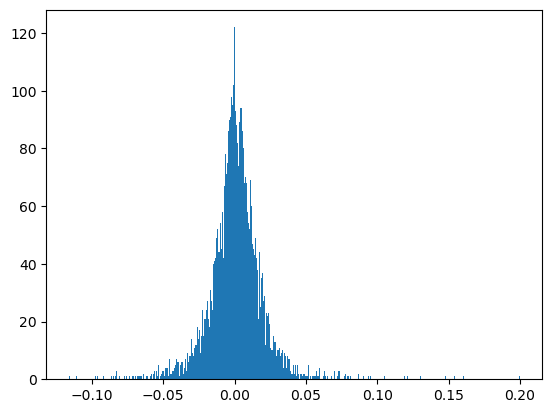

In [9]:
H2 = Google_classC['simple_return']
plt.hist(H2,bins=500)
plt.show()

In [12]:
Google_classA['simple_return'].describe()

count    4674.000000
mean        0.000967
std         0.019430
min        -0.116341
25%        -0.007991
50%         0.000748
75%         0.010059
max         0.199915
Name: simple_return, dtype: float64

In [13]:
Google_classA['simple_return'].mean() * 250

0.24185581096575062

In [14]:
Google_classA['simple_return'].std() * 250 ** 0.5

0.30721434814370213

In [15]:
Google_classA['simple_return'].var()

0.00037752262282143937

In [16]:
Sharpe_ratio = (Google_classA['simple_return'].mean() * 250 - 0.03) / (Google_classA['simple_return'].std() * (250 ** 0.5))
Sharpe_ratio

0.6896025926062973

In [17]:
Google_classC['simple_return'].describe()

count    4674.000000
mean        0.000970
std         0.019443
min        -0.116091
25%        -0.007782
50%         0.000698
75%         0.010080
max         0.199915
Name: simple_return, dtype: float64

In [18]:
Google_classC['simple_return'].mean() * 250

0.24240992510129458

In [19]:
Google_classC['simple_return'].std() * 250 ** 0.5

0.30742560873604485

In [50]:
Google_classC['simple_return'].var()

0.0003780420196269109

In [49]:
Sharpe_ratio = (Google_classC['simple_return'].mean() * 250 - 0.03) / (Google_classC['simple_return'].std() * (250 ** 0.5))
Sharpe_ratio

0.6909311360709361

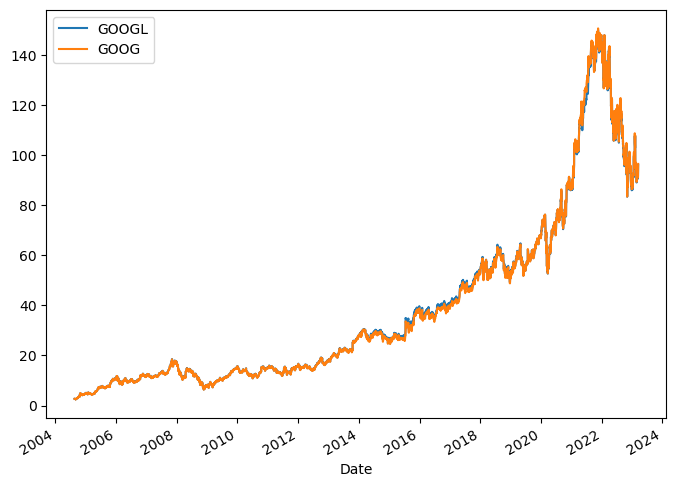

In [58]:
plt.figure(figsize=(8,6))
Google_classA['Adj Close'].plot()
Google_classC['Adj Close'].plot()
plt.legend(['GOOGL', 'GOOG'])

In [22]:
Google_classA['simple_return'].skew()

0.6650310627869224

In [23]:
Google_classC['simple_return'].skew()

0.6787845666558499

In [24]:
Google_classA['simple_return'].kurtosis()

9.38183955968562

In [25]:
Google_classC['simple_return'].kurtosis()

9.386429473028283

In [26]:
tickers = ['GOOGL', 'GOOG']
 
sec_data = pd.DataFrame()
 
for t in tickers:
    sec_data[t] = pdr.get_data_yahoo(t)['Adj Close']
sec_returns = ((sec_data/sec_data.shift(1))-1)*100
sec_returns = sec_returns.dropna(axis=0, how='any')
sec_returns = sec_returns.tz_localize(None)
sec_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL      GOOG
Date                          
2004-08-20  7.942979  7.942989
2004-08-23  1.006395  1.006362
2004-08-24 -4.140790 -4.140766
2004-08-25  1.077555  1.077510
2004-08-26  1.801855  1.801895
...              ...       ...
2023-03-09 -2.047746 -2.102481
2023-03-10 -1.830592 -1.780705
2023-03-13  0.529630  0.714209
2023-03-14  3.139063  2.825656
2023-03-15  2.277322  2.440322

[4674 rows x 2 columns]

One-sample t-test

In [27]:
sst.ttest_1samp(a=sec_returns['GOOGL'], popmean=0)

Ttest_1sampResult(statistic=3.403998664460451, pvalue=0.0006696580560158334)

In [28]:
sst.ttest_1samp(a=sec_returns['GOOG'], popmean=0)

Ttest_1sampResult(statistic=3.409452979790646, pvalue=0.0006564425079374682)

In [29]:
df_GOOGL = sec_returns['GOOGL'].count()-1  # degree of freedom
df_GOOGL

4673

Two-sample t-test

In [30]:
sst.ttest_ind(a = sec_returns['GOOGL'], b = sec_returns['GOOG'], equal_var=True)

Ttest_indResult(statistic=-0.00551274318940161, pvalue=0.9956016072585937)

Paired t-test

In [31]:
sst.ttest_rel(a = sec_returns['GOOGL'], b = sec_returns['GOOG'])

Ttest_relResult(statistic=-0.10578554907574955, pvalue=0.9157570430986792)

Run a CAPM model to evaluate performance of the two funds: GOOGL and GOOG

In [32]:
all=pd.merge(sec_returns,ff,left_index=True,right_index=True)
all.head()

GOOGL      GOOG  Mkt-RF   SMB   HML     RF
Date                                                     
2004-08-20  7.942979  7.942989    0.79  0.91 -0.27  0.005
2004-08-23  1.006395  1.006362   -0.32 -0.33 -0.30  0.005
2004-08-24 -4.140790 -4.140766    0.03  0.15  0.15  0.005
2004-08-25  1.077555  1.077510    0.84  0.13 -0.48  0.005
2004-08-26  1.801855  1.801895   -0.05 -0.49  0.40  0.005

In [33]:
all['GOOGL-RF']=all['GOOGL']-all['RF']
all['GOOG-RF']=all['GOOG']-all['RF']
all.head()

GOOGL      GOOG  Mkt-RF   SMB   HML     RF  GOOGL-RF   GOOG-RF
Date                                                                         
2004-08-20  7.942979  7.942989    0.79  0.91 -0.27  0.005  7.937979  7.937989
2004-08-23  1.006395  1.006362   -0.32 -0.33 -0.30  0.005  1.001395  1.001362
2004-08-24 -4.140790 -4.140766    0.03  0.15  0.15  0.005 -4.145790 -4.145766
2004-08-25  1.077555  1.077510    0.84  0.13 -0.48  0.005  1.072555  1.072510
2004-08-26  1.801855  1.801895   -0.05 -0.49  0.40  0.005  1.796855  1.796895

In [34]:
X=all['Mkt-RF']
X.head()

Date
2004-08-20    0.79
2004-08-23   -0.32
2004-08-24    0.03
2004-08-25    0.84
2004-08-26   -0.05
Name: Mkt-RF, dtype: float64

In [35]:
X1=sm.add_constant(X)
reg=sm.OLS(all['GOOGL-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GOOGL-RF   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     3264.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                -8422.8
No. Observations:                4644   AIC:                         1.685e+04
Df Residuals:                    4642   BIC:                         1.686e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0530      0.022      2.433      0.015       0.010       0.096
Mkt-RF         0.9980      0.017     57.134      0.000       0.964       1.032
==============================================================================
Omnibus:                     1979.075   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77235.730
Skew:                           1.343   Prob(JB):                         0.00
Kurtosis:                      22.797   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X1=sm.add_constant(X)
reg=sm.OLS(all['GOOG-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     3243.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                -8432.4
No. Observations:                4644   AIC:                         1.687e+04
Df Residuals:                    4642   BIC:                         1.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.022      2.446      0.014       0.011       0.096
Mkt-RF         0.9968      0.018     56.948      0.000       0.962       1.031
==============================================================================
Omnibus:                     1971.741   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76709.920
Skew:                           1.336   Prob(JB):                         0.00
Kurtosis:                      22.731   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X=all[['Mkt-RF','SMB','HML']]
X.head()

Mkt-RF   SMB   HML
Date                          
2004-08-20    0.79  0.91 -0.27
2004-08-23   -0.32 -0.33 -0.30
2004-08-24    0.03  0.15  0.15
2004-08-25    0.84  0.13 -0.48
2004-08-26   -0.05 -0.49  0.40

In [38]:
X1=sm.add_constant(X)
reg=sm.OLS(all['GOOGL-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GOOGL-RF   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1193.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                -8331.7
No. Observations:                4644   AIC:                         1.667e+04
Df Residuals:                    4640   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0511      0.021      2.389      0.017       0.009       0.093
Mkt-RF         1.0551      0.018     59.302      0.000       1.020       1.090
SMB           -0.1603      0.036     -4.468      0.000      -0.231      -0.090
HML           -0.3615      0.027    -13.279      0.000      -0.415      -0.308
==============================================================================
Omnibus:                     2109.726   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86071.075
Skew:                           1.469   Prob(JB):                         0.00
Kurtosis:                      23.885   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X1=sm.add_constant(X)
reg=sm.OLS(all['GOOG-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                -8344.6
No. Observations:                4644   AIC:                         1.670e+04
Df Residuals:                    4640   BIC:                         1.672e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515      0.021      2.403      0.016       0.009       0.094
Mkt-RF         1.0533      0.018     59.035      0.000       1.018       1.088
SMB           -0.1610      0.036     -4.475      0.000      -0.231      -0.090
HML           -0.3554      0.027    -13.018      0.000      -0.409      -0.302
==============================================================================
Omnibus:                     2095.272   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84879.829
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                      23.741   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pearson Correlation Test

In [40]:
sst.pearsonr(sec_returns['GOOGL'],sec_returns['GOOG'])

PearsonRResult(statistic=0.9972845291260648, pvalue=0.0)

Spearman Rank Correlation Test

In [41]:
sst.spearmanr(sec_returns)

SpearmanrResult(correlation=0.9950904228857657, pvalue=0.0)

Monte Carlo Simulation (Predict Future Price)

In [42]:
Google_classA_returns_mean=Google_classA['simple_return'].mean()
Google_classA_returns_std=Google_classA['simple_return'].std()
iterations=10000 # Give Google 10k lives
future_range=250 # Each life has 250 days (one year)

future_Adj_Closes = pd.DataFrame()

for i in range(iterations):
    future_price = Google_classA['Adj Close'].iloc[-1]
    future_prices = [future_price]
    for j in range(future_range):
        future_price = future_price * (1+np.random.normal(Google_classA_returns_mean, Google_classA_returns_std))
        future_prices.append(future_price)
    future_Adj_Closes[i] = pd.Series(future_prices)

future_Adj_Closes

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_Adj_Closes[i] = pd.Series(future_prices)
/var/folders/0f/7fh08h711vdf0z0zmwrqpl7c0000gn/T/ipykernel_22652/2223814702.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

0          1           2          3          4          5     \
0     96.110001  96.110001   96.110001  96.110001  96.110001  96.110001   
1     96.460326  96.383248   96.602452  95.483021  95.238898  97.511627   
2     95.292544  99.340831   98.409076  97.159042  95.837550  93.931597   
3     96.206845  97.992241  100.750031  97.276975  96.591361  93.564937   
4     97.817211  98.987944  101.500453  96.329098  97.411329  93.329538   
..          ...        ...         ...        ...        ...        ...   
246  112.521411  81.808971  186.407494  74.639977  68.599757  68.112405   
247  112.086838  79.949331  189.109076  76.362307  69.094371  68.965068   
248  112.717091  80.239290  192.629873  75.173671  68.623886  69.856951   
249  108.765457  81.600077  194.140177  74.677067  68.689412  69.799629   
250  108.971789  85.754040  186.657716  72.295505  70.297420  71.820091   

           6           7           8           9     ...       9990  \
0     96.110001   96.110001   96.110001   96.110001  ...  96.110001   
1     94.738007   96.970363   94.448784   98.854644  ...  95.192691   
2     93.873422   95.249808   93.161029  102.874914  ...  96.995620   
3     99.588979   97.014235   92.497150   98.910324  ...  96.945926   
4     96.753756   98.118483   92.805419  102.463983  ...  95.471834   
..          ...         ...         ...         ...  ...        ...   
246  122.101192  114.822717  124.961289   87.444242  ...  61.331263   
247  124.442105  117.437637  123.212410   87.448394  ...  61.714349   
248  126.618697  113.080891  120.141143   88.012279  ...  60.815729   
249  129.959699  112.608986  119.595543   87.621695  ...  60.743177   
250  128.760000  111.968304  118.243346   90.258620  ...  60.105037   

          9991        9992        9993        9994       9995        9996  \
0    96.110001   96.110001   96.110001   96.110001  96.110001   96.110001   
1    93.059515   97.413327   98.403001   95.089810  94.719313   98.142911   
2    93.166425   97.292998   99.182375   96.509658  94.345514   98.810017   
3    94.853168   97.442502   96.132012   97.109057  91.736072  100.531294   
4    95.966372  101.247810   96.821674   97.869546  92.394912  104.946504   
..         ...         ...         ...         ...        ...         ...   
246  63.109113  129.551304  173.451184  202.759972  68.253112  168.291417   
247  65.517918  131.126785  170.348798  198.229525  66.687147  168.214016   
248  65.574012  131.146353  173.887373  205.165346  68.210418  173.399144   
249  68.069425  128.377230  172.122276  204.143831  67.077197  169.126843   
250  67.896233  126.474254  168.263611  202.597308  65.852649  171.287822   

           9997        9998        9999  
0     96.110001   96.110001   96.110001  
1     96.838294   95.521661   98.112391  
2     95.866423   98.474029  100.366368  
3     97.997103  102.030106   98.470575  
4     97.023066  101.135622   98.533753  
..          ...         ...         ...  
246  114.636486  120.544076   90.773067  
247  113.658821  117.814875   90.889920  
248  114.811163  117.977786   90.583706  
249  112.663556  114.986831   89.131745  
250  113.109361  115.378024   88.582223  

[251 rows x 10000 columns]

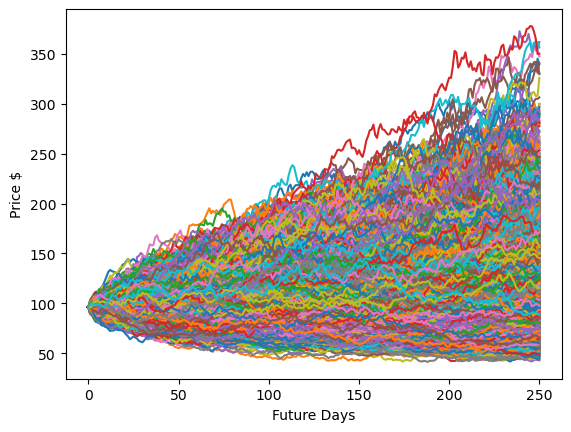

In [43]:
plt.plot(future_Adj_Closes)
plt.ylabel('Price $')
plt.xlabel('Future Days')
plt.show()

In [44]:
future_Adj_Close = future_Adj_Closes.iloc[-1]
future_Adj_Close.describe()

count    10000.000000
mean       122.924138
std         38.660658
min         42.777863
25%         95.385984
50%        117.139716
75%        144.706612
max        361.989073
Name: 250, dtype: float64

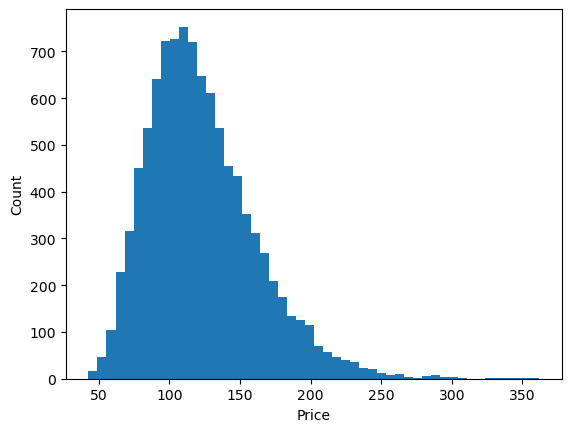

In [45]:
H3 = future_Adj_Close
plt.hist(H3,bins=50)
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

In [46]:
hist = np.histogram(future_Adj_Close,bins=50)
hist_dist = sst.rv_histogram(hist)

95% confident 'GOOGL' will fall in the interval below in a year.

In [47]:
hist_dist.ppf(0.975) # Upper Bound

213.13584549744112

In [48]:
hist_dist.ppf(0.025) # Lower Bound

64.19861530279198